In [29]:
import pandas as pd
import numpy as np

# Acquire data

In [30]:
# read` the contents of the csv file in a df variable
df = pd.read_csv('data/Camera.csv')
df.shape

(1039, 13)

In [31]:
df['Make'] = df.Model.str.split(" ").str[0]
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# Refine data

### Drop duplicate rows of data, retain the first occurence

In [32]:

df[df.duplicated(keep=False)]

,Make,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
8,Canon,Canon PowerShot 350,1997,640,0,0,42,42,70,3,2,320,93,149
9,Canon,Canon PowerShot 350,1997,640,0,0,42,42,70,3,2,320,93,149


In [33]:
df.drop_duplicates(keep='first',inplace=False)

,Make,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,STRING,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE
1,Agfa,Agfa ePhoto 1280,1997,1024,640,0,38,114,70,40,4,420,95,179
2,Agfa,Agfa ePhoto 1680,1998,1280,640,1,38,114,50,0,4,420,158,179
3,Agfa,Agfa ePhoto CL18,2000,640,0,0,45,45,0,0,2,0,0,179
4,Agfa,Agfa ePhoto CL30,1999,1152,640,0,35,35,0,0,4,0,0,269
5,Agfa,Agfa ePhoto CL30 Clik!,1999,1152,640,0,43,43,50,0,40,300,128,1299
6,Agfa,Agfa ePhoto CL45,2001,1600,640,1,51,51,50,20,8,270,119,179
7,Agfa,Agfa ePhoto CL50,1999,1280,640,1,34,102,0,0,8,0,0,0
8,Canon,Canon PowerShot 350,1997,640,0,0,42,42,70,3,2,320,93,149
10,Canon,Canon PowerShot A10,2001,1280,1024,1,35,105,76,16,8,375,110,139


In [34]:
df.shape

(1039, 14)

### Drop rows with invalid year

In [35]:
# Find rows with invalid year
df.loc[df['Release date'] < '1900']

,Make,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
1029,Toshiba,Toshiba PDR-M3,123,1280,640,1,38,115,90,25,4,380,122,62


In [36]:
df = df[df['Release date'] > '1900']  
df.shape

(1038, 14)

In [37]:
df = df[df['Release date'] < '2017']  
df.shape

(1036, 14)

### Drop with 0 or negative price

In [38]:
# Find rows with 0 or negative price
df.loc[df['Price'] <= '0']

,Make,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
7,Agfa,Agfa ePhoto CL50,1999,1280,640,1,34,102,0,0,8,0,0,0
14,Canon,Canon PowerShot A30,2002,1280,1024,1,35,105,76,16,8,350,110,-599
17,Canon,Canon PowerShot A40,2002,1600,1024,1,35,105,76,16,8,350,110,0


In [39]:
df = df[df['Price'] > '0']  
df.shape

(1033, 14)

# Report missing data

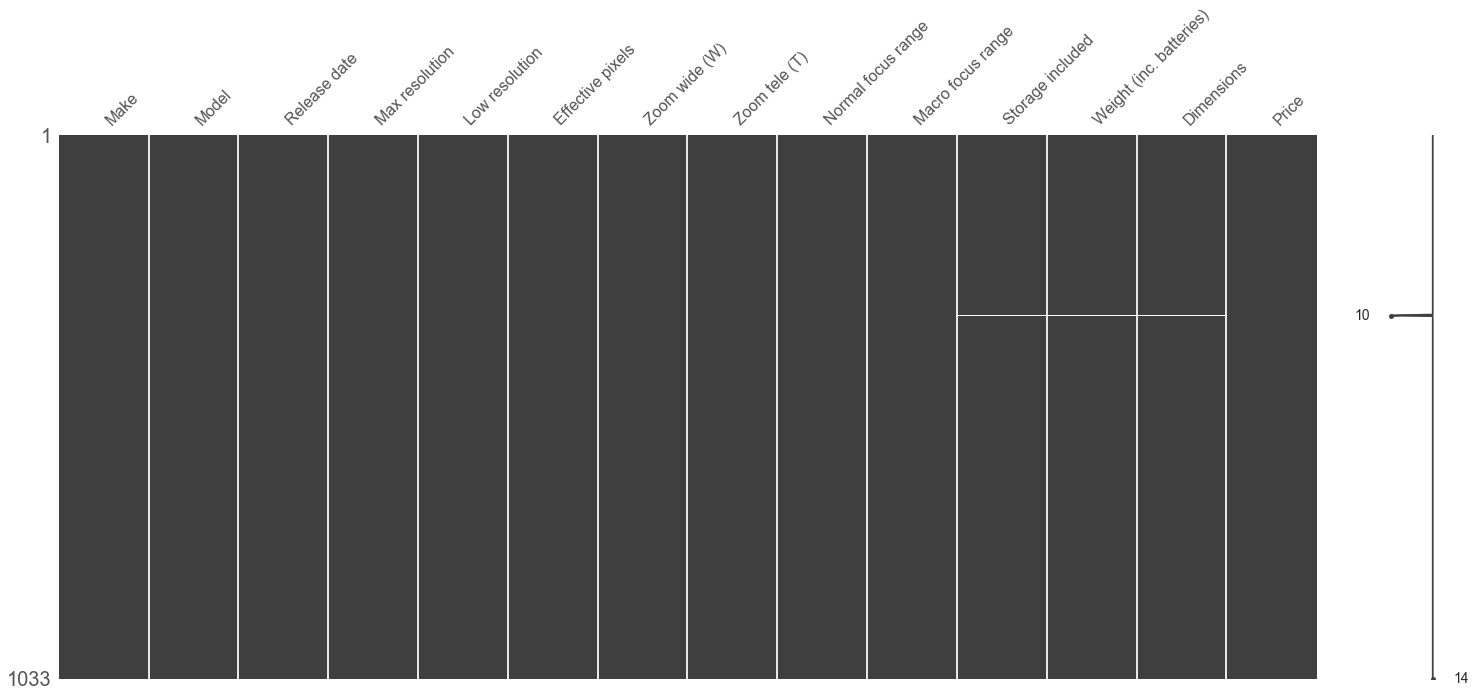

In [40]:
# Draw make vs costs
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
msno.matrix(df)

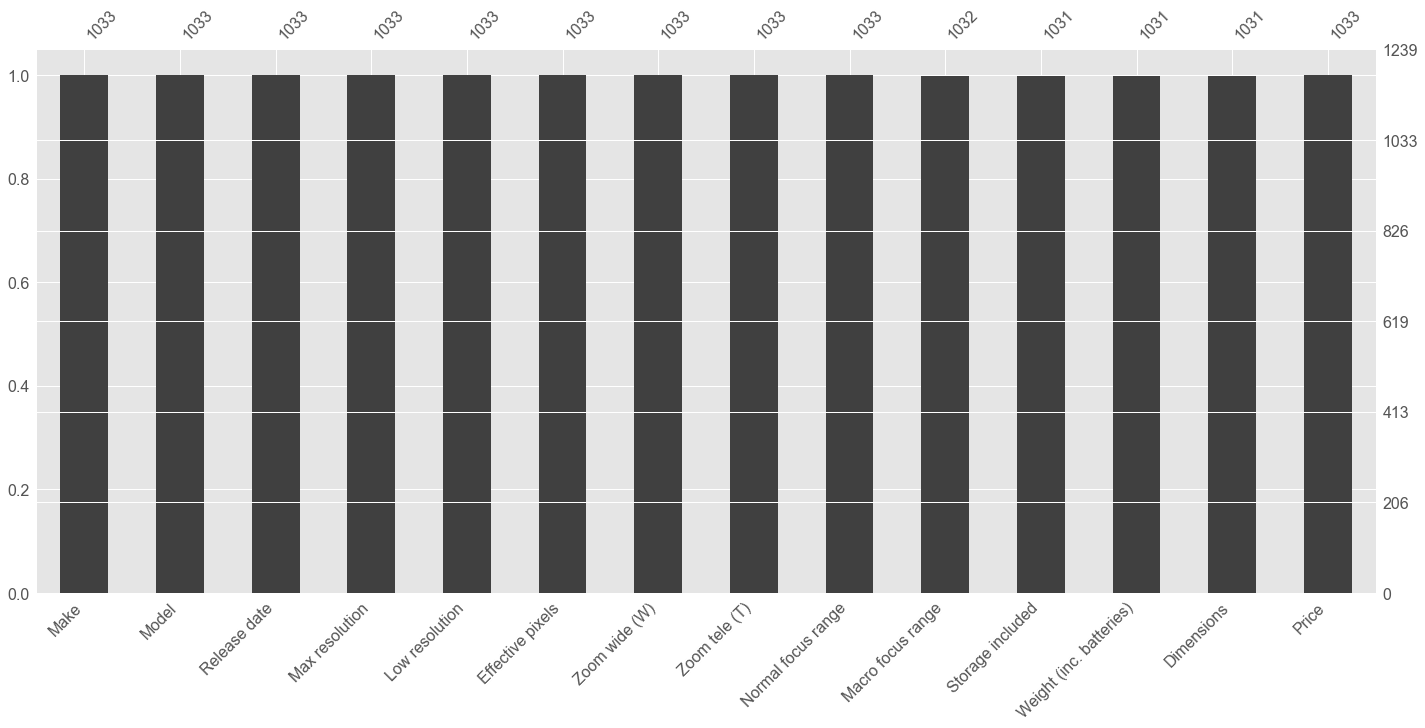

In [41]:
msno.bar(df)

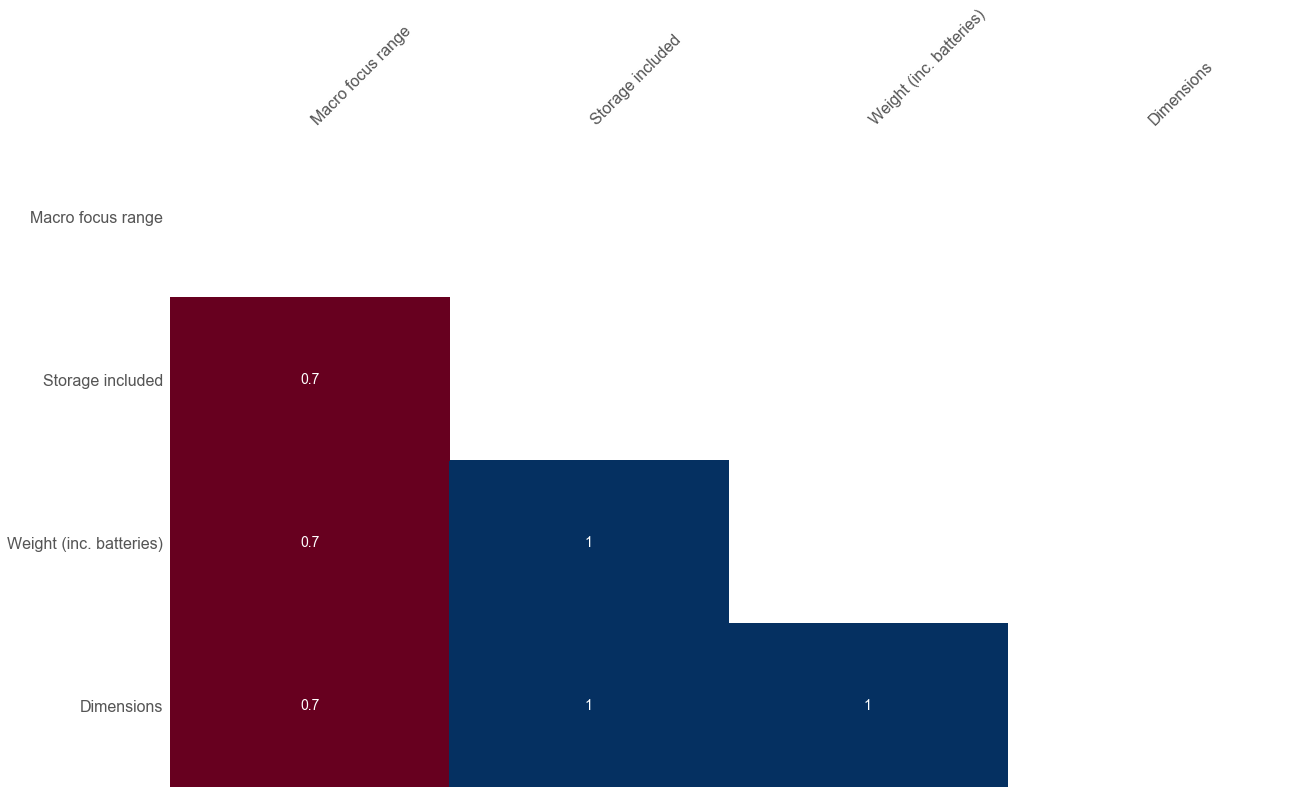

In [42]:
msno.heatmap(df)

# Remove rows where data is missing

In [43]:
df.columns = ["make", "model", "release_date", "max_resolution", "low_resolution", "pixels", 
                  "zoom_wide", "zoom_tele", "normal_focus", "macro_focus","storage", "weight", "dimensions", "price"]

In [44]:
df.dtypes

make              object
model             object
release_date      object
max_resolution    object
low_resolution    object
pixels            object
zoom_wide         object
zoom_tele         object
normal_focus      object
macro_focus       object
storage           object
weight            object
dimensions        object
price             object
dtype: object

In [45]:
df.storage.isnull().sum()

2

In [46]:
df.dimensions.isnull().sum()

2

In [47]:
df.weight.isnull().sum()

2

In [48]:
df.shape

(1033, 14)

Drop the rows with no data

In [49]:
df.dropna(subset=['storage', 'dimensions', 'weight'], inplace=True)
df.shape

(1031, 14)

In [50]:
df[['release_date', 'storage', 'price']] = df[['release_date', 'storage','price']].astype(int)

### Predict price of camera based on release date and storage


In [51]:
# create the x matrix
n = 1031
x0 = np.ones(n)
x1 = df.release_date
x2 = df.storage
X = np.c_[x0, x1, x2]
X

array([[  1.00000000e+00,   1.99700000e+03,   4.00000000e+00],
       [  1.00000000e+00,   1.99800000e+03,   4.00000000e+00],
       [  1.00000000e+00,   2.00000000e+03,   2.00000000e+00],
       ..., 
       [  1.00000000e+00,   2.00000000e+03,   1.60000000e+01],
       [  1.00000000e+00,   2.00100000e+03,   8.00000000e+00],
       [  1.00000000e+00,   2.00100000e+03,   1.60000000e+01]])

In [52]:
X

array([[  1.00000000e+00,   1.99700000e+03,   4.00000000e+00],
       [  1.00000000e+00,   1.99800000e+03,   4.00000000e+00],
       [  1.00000000e+00,   2.00000000e+03,   2.00000000e+00],
       ..., 
       [  1.00000000e+00,   2.00000000e+03,   1.60000000e+01],
       [  1.00000000e+00,   2.00100000e+03,   8.00000000e+00],
       [  1.00000000e+00,   2.00100000e+03,   1.60000000e+01]])

In [53]:
X.shape

(1031, 3)

In [54]:
# create the y matrix
y = np.asmatrix(df.price.reshape(-1,1))
y

C:\Users\bindus\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


matrix([[179],
        [179],
        [179],
        ..., 
        [ 62],
        [ 62],
        [ 62]])

In [55]:
#y = y.astype(int)


In [56]:
X_T = np.transpose(X)
X_T.shape
#X_T = X_T.astype(int)
X_T

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.99700000e+03,   1.99800000e+03,   2.00000000e+03, ...,
          2.00000000e+03,   2.00100000e+03,   2.00100000e+03],
       [  4.00000000e+00,   4.00000000e+00,   2.00000000e+00, ...,
          1.60000000e+01,   8.00000000e+00,   1.60000000e+01]])

In [57]:
X_T.shape

(3, 1031)

In [58]:
#X_T * X
XT = np.dot(X_T, X)
#XT = np.dot(X_T,X)

In [59]:
X_pseudo = np.dot(np.linalg.inv(XT), X_T)
X_pseudo

array([[  1.74042140e+00,   1.46509366e+00,   9.02947876e-01, ...,
          9.83380152e-01,   6.62091119e-01,   7.08052420e-01],
       [ -8.68170745e-04,  -7.30729044e-04,  -4.50087317e-04, ...,
         -4.90395585e-04,  -3.29920588e-04,  -3.52953884e-04],
       [  8.53529756e-07,  -2.02563228e-06,  -1.04727297e-05, ...,
          8.34868372e-06,  -5.28557170e-06,   5.46952168e-06]])

In [60]:
X_pseudo.shape

(3, 1031)

In [61]:
beta = X_pseudo * y
beta

matrix([[  2.25487448e+03],
        [ -8.71044749e-01],
        [ -2.86457885e+00]])

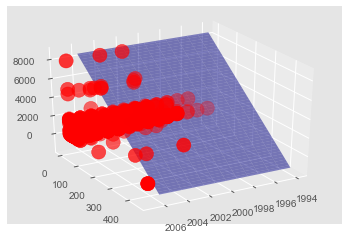

In [62]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df.release_date,df.storage,df.price, c='r', marker='o', s = 200)

xrange = np.arange(min(df.release_date), max(df.release_date), 1)
yrange = np.arange(min(df.storage), max(df.storage), 1)
x, y = np.meshgrid(xrange, yrange)
z = 524 - 22 * y + 4 * x
ax.plot_surface(x, y, z, color ='blue', alpha = 0.5)
ax.view_init(azim=60)

## Use sklearn to solve the equations


In [63]:
from sklearn import linear_model
y = df.price
X = df[['release_date', 'storage']]

In [64]:
model_sklearn = linear_model.LinearRegression()
model_sklearn.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
model_sklearn.coef_

array([-0.87104475, -2.86457885])

In [66]:
model_sklearn.intercept_

2254.8744774531442

In [67]:
model_sklearn_norm = linear_model.LinearRegression(normalize = True)

In [69]:
beta0 = round(model_sklearn.intercept_)
beta1 = round(model_sklearn.coef_[0])
beta2 = round(model_sklearn.coef_[1])
print("b0 = ", beta0, "b1 =", beta1,"b2 =", beta2)

b0 =  2255.0 b1 = -1.0 b2 = -3.0


## Plotting the Regression Line

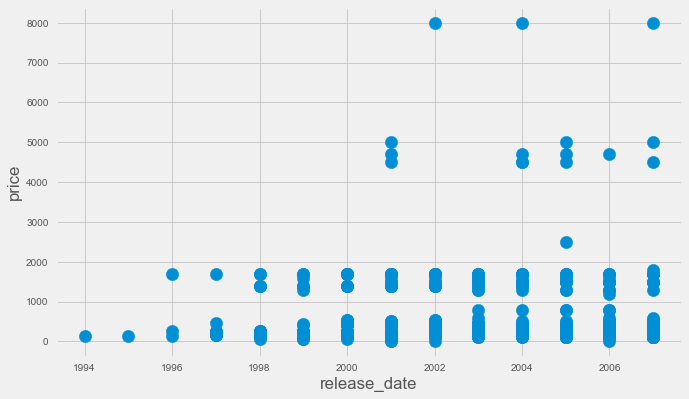

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(df.release_date, df.price, s = 150)
plt.xlabel('release_date')
plt.ylabel('price')

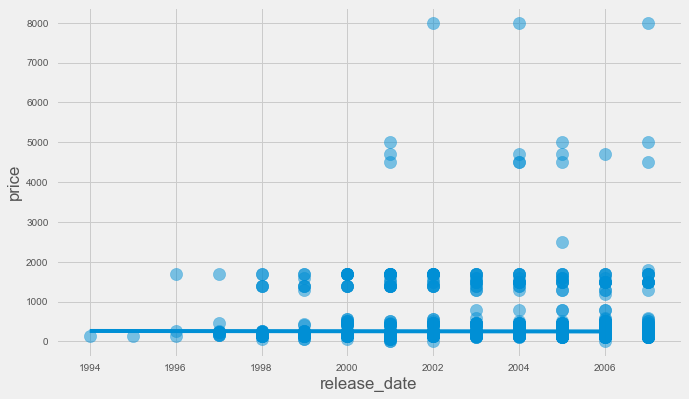

In [71]:
x = np.arange(min(df.release_date),max(df.release_date),1)

plt.xlabel('release_date')

plt.ylabel('price')

y_p = beta0 + beta1 * x
plt.plot(x, y_p, '-')
plt.scatter(df.release_date, df.price, s = 150, alpha = 0.5 )

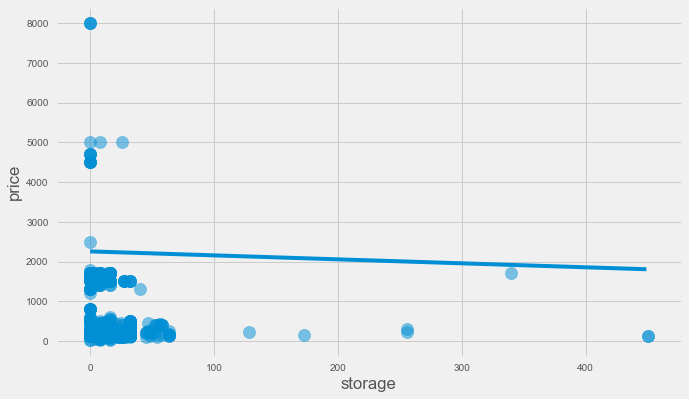

In [72]:
x = np.arange(min(df.storage),max(df.storage),1)

plt.xlabel('storage')
plt.ylabel('price')

y_p = beta0 + beta1 * x
plt.plot(x, y_p, '-')
plt.scatter(df.storage, df.price, s = 150, alpha = 0.5 )

## Calculating the Error term

The error term as we saw is defined as:

$$ E(\beta)=   \frac {1}{n} {||y - X\beta||}^2 $$

In [73]:
# Solving using Ax = b approach
n = df.shape[0]
x0 = np.ones(n)
x1 = df.release_date
x2 = df.storage
X = np.c_[x0, x1, x2]
X = np.asmatrix(X)
y = np.asmatrix(df.price.values.reshape(-1,1))
b = np.asmatrix([[beta0],
                 [beta1],[beta2]])

In [74]:
# Error calculation
def error_term(X,y,b,n):
    M = (y - X*b)
    error = M.T*M / n
    return error[0,0]

In [75]:
round(error_term(X,y,b,n))

642619.0

# Gradient Descent


In [112]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y 
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m 
        # update
        theta = theta - alpha * gradient
    return theta

In [116]:
m, n = np.shape(X)
numIterations= 100000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(X, y, theta, alpha, m, numIterations)
print(theta)

ValueError: input must be a square array